In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import os 
display (os.getcwd())

'C:\\Users\\Harsha Marishetty'

In [9]:
os.chdir ('C:\\Users\\Harsha Marishetty\\Downloads\\')

In [10]:
df = pd.read_csv("Dataset .csv")
display (df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
# Task 01 : Top Cuisines
cuisines_split = df['Cuisines'].str.split(r'\s*', expand=True).stack()
cuisine_counts = cuisines_split.value_counts()
top_3_cuisines = cuisine_counts.head(3)
print("Top 3 most common cuisines:")
print(top_3_cuisines)

Top 3 most common cuisines:
     37197
n    17601
a    16702
Name: count, dtype: int64


In [23]:
total_restaurants = len(df)
cuisines_split = df['Cuisines'].fillna('').str.split(r'\s*', expand=True).stack()
cuisine_counts = cuisines_split.value_counts()
top_3_cuisines = cuisine_counts.head(3)
results_df = pd.DataFrame(
    {
    'Count': top_3_cuisines.values
}, index=top_3_cuisines.index)
results_df['Percentage (%)'] = (results_df['Count'] / total_restaurants) * 100
results_df['Percentage (%)'] = results_df['Percentage (%)'].round(2)

print(results_df)

   Count  Percentage (%)
   37215          389.65
n  17601          184.28
a  16702          174.87


In [25]:
#Task 02 : City Analysis
city_counts = df['City'].value_counts()
top_city = city_counts.head(1)
print(f"City with the highest number of restaurants: {top_city.index[0]}")
print(f"Number of restaurants: {top_city.values[0]}")

City with the highest number of restaurants: New Delhi
Number of restaurants: 5473


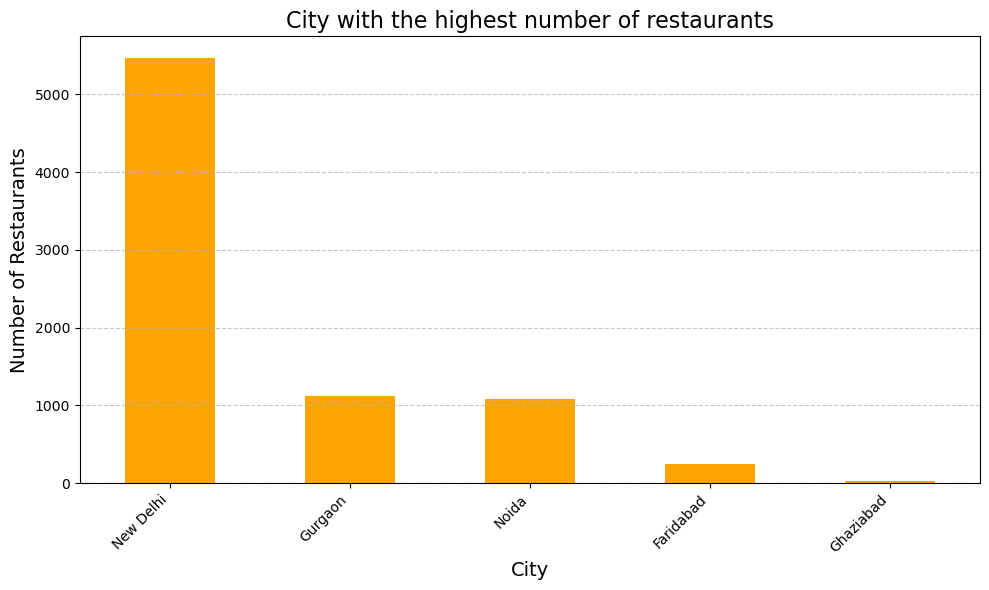

In [28]:
city_counts = df['City'].value_counts()
top_5_cities = city_counts.head(5)
# creating a bar chart for the top 5 cities 
plt.figure(figsize=(10, 6))
top_5_cities.plot(kind='bar', color='orange')
plt.title('City with the highest number of restaurants', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_5_cities_by_restaurants.png')

In [29]:
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
average_ratings_by_city.columns = ['City', 'Average Rating']
average_ratings_by_city['Average Rating'] = average_ratings_by_city['Average Rating'].round(2)
average_ratings_by_city = average_ratings_by_city.sort_values(by='Average Rating', ascending=False)
print(average_ratings_by_city)

                 City  Average Rating
56         Inner City            4.90
107       Quezon City            4.80
73        Makati City            4.65
95         Pasig City            4.63
75   Mandaluyong City            4.62
..                ...             ...
88          New Delhi            2.44
83          Montville            2.40
78          Mc Millan            2.40
89              Noida            2.04
43          Faridabad            1.87

[141 rows x 2 columns]


In [30]:
#city with the highest average rating
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
average_ratings_by_city.columns = ['City', 'Average Rating']
average_ratings_by_city['Average Rating'] = average_ratings_by_city['Average Rating'].round(2)
highest_rated_city = average_ratings_by_city.sort_values(
    by='Average Rating', 
    ascending=False
).head(1)
print(highest_rated_city)

          City  Average Rating
56  Inner City             4.9


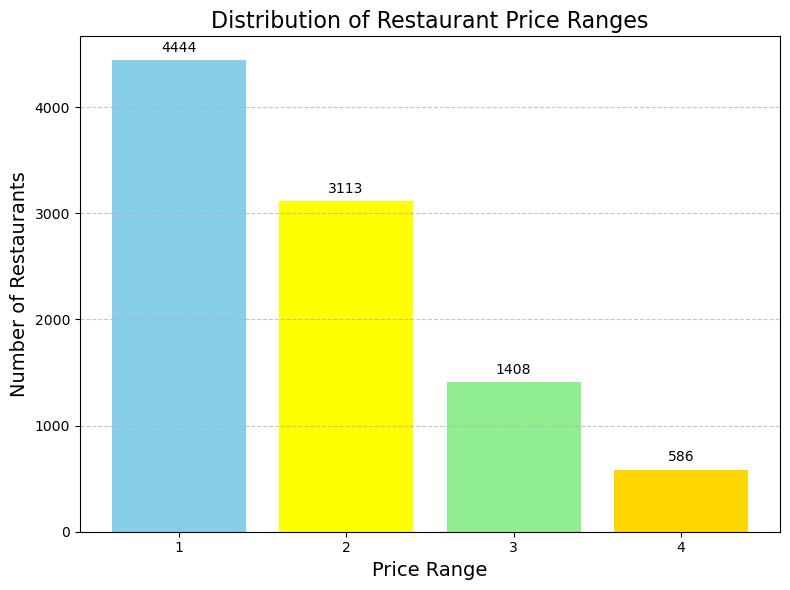

In [32]:
# Task 03 : Price Range Distribution
price_range_counts = df['Price range'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(
    price_range_counts.index.astype(str), 
    price_range_counts.values,
    color=['skyblue', 'yellow', 'lightgreen', 'gold'])
plt.title('Distribution of Restaurant Price Ranges', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('price_range_distribution_bar_chart.png')

In [33]:
total_restaurants = len(df)
price_range_counts = df['Price range'].value_counts().sort_index()
price_range_percentage = (price_range_counts / total_restaurants) * 100
results_df = pd.DataFrame({
    'Count': price_range_counts,
    'Percentage (%)': price_range_percentage.round(2)})
results_df.index.name = 'Price Range'
print(results_df)

             Count  Percentage (%)
Price Range                       
1             4444           46.53
2             3113           32.59
3             1408           14.74
4              586            6.14


In [34]:
# Task 04 : Online Delivery
total_restaurants = len(df) # 9551
yes_count = df['Has Online delivery'].value_counts().get('Yes', 0)
percentage = (yes_count / total_restaurants) * 100
print(f"Percentage of restaurants with online delivery: {percentage:.2f}%")

Percentage of restaurants with online delivery: 25.66%


In [36]:
average_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
average_ratings.columns = ['Online Delivery', 'Average Rating']
average_ratings['Average Rating'] = average_ratings['Average Rating'].round(2)

print(average_ratings)

  Online Delivery  Average Rating
0              No            2.47
1             Yes            3.25
